# 📈 IoT Agriculture 2024 Dataset Analysis

Let's do some data analysis on the **IoT Agriculture 2024** dataset.  
I pulled this data from Kaggle:

🔗 [View Dataset on Kaggle](https://www.kaggle.com/datasets/wisam1985/iot-agriculture-2024/data)

---

## 📚 About the Dataset

**Data Source and Authors:**  
This dataset originates from a master's thesis research project by **Mohammed Ismail Lifta (2023–2024)** at the Department of Computer Science, College of Computer Science and Mathematics, Tikrit University, Iraq. The research was supervised by **Assistant Professor Wissam Dawood Abdullah**, Director of the Cisco Networking Academy at Tikrit University.

A smart greenhouse was constructed using IoT sensors and actuators to monitor and control environmental conditions. Data was collected and linked to Google Sheets for real-time tracking.

> 💡 **Rows:** 37,923  **Columns:** 13

---

## 🧾 Columns and Data Types

| Column                          | Type       | Description |
|---------------------------------|------------|-------------|
| `date`                          | datetime64 | Timestamp of the measurement |
| `temperature`                   | int64      | Temperature (°C) |
| `humidity`                      | int64      | Humidity (%) |
| `water_level`                   | int64      | Water level (%) |
| `N`, `P`, `K`                   | int64      | Soil nutrients (Nitrogen, Phosphorus, Potassium), scaled 0–255 |
| `Fan_actuator_OFF/ON`          | float64    | Fan actuator status (0 or 1) |
| `Watering_plant_pump_OFF/ON`   | float64    | Plant watering pump status |
| `Water_pump_actuator_OFF/ON`   | float64    | Water pump actuator status |

---

## 🧹 Additional Details

- Duplicate and missing rows were removed.
- Categorical columns were encoded using **One-Hot Encoding**.
- The dataset is cleaned and ready for **machine learning** analysis.

---

## 📄 License

This dataset is licensed under **Creative Commons BY-ND (Attribution-NoDerivs)**.  
You may use the data for environmental research, but **no modifications are allowed**, and **proper attribution is required**.

---

## 📬 Contact

For more information:  
**Assistant Professor Wissam Dawood Abdullah**  
📧 [wisamdawood@tu.edu.iq](mailto:wisamdawood@tu.edu.iq)

---
## Let's analyze the data! 🚜🌱
---

### Step 1: Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2: read in and review the dataset, clean data? 

In [3]:
data_set = pd.read_csv('./data/IoTProcessed_Data.csv')

### Step 3: Initial data exploration


In [4]:
data_set.describe()

,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
count,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000
mean,18.760113,50.329308,79.401587,231.963610,234.123332,225.171879,0.689863,0.310137,0.762091,0.237909,0.774142,0.225858
std,7.143422,22.995645,36.824610,34.718121,31.452138,44.877635,0.462555,0.462555,0.425809,0.425809,0.418152,0.418152
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,49.000000,79.000000,185.000000,190.000000,160.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,17.000000,59.000000,100.000000,255.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,25.000000,62.000000,100.000000,255.000000,255.000000,255.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,41.000000,100.000000,100.000000,255.000000,255.000000,259.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data_set.columns

Index(['date', 'tempreature', 'humidity', 'water_level', 'N', 'P', 'K',
       'Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF',
       'Watering_plant_pump_ON', 'Water_pump_actuator_OFF',
       'Water_pump_actuator_ON'],
      dtype='object')

In [6]:
data_set.isnull().sum() # looks like there some missing date values in the dataset

date                       2
tempreature                0
humidity                   0
water_level                0
N                          0
P                          0
K                          0
Fan_actuator_OFF           0
Fan_actuator_ON            0
Watering_plant_pump_OFF    0
Watering_plant_pump_ON     0
Water_pump_actuator_OFF    0
Water_pump_actuator_ON     0
dtype: int64

In [7]:
# the missing date values are here.
data_set[data_set['date'].isnull()]

,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
14349,NaN,20,45,86,255,255,255,1.0,0.0,0.0,1.0,1.0,0.0
14350,NaN,20,45,67,255,255,255,1.0,0.0,0.0,1.0,0.0,1.0


In [8]:
# lets drop those rows
data_set = data_set.dropna(subset=['date']) # lets drop those rows
data_set.isnull().sum()

date                       0
tempreature                0
humidity                   0
water_level                0
N                          0
P                          0
K                          0
Fan_actuator_OFF           0
Fan_actuator_ON            0
Watering_plant_pump_OFF    0
Watering_plant_pump_ON     0
Water_pump_actuator_OFF    0
Water_pump_actuator_ON     0
dtype: int64

In [9]:
# setting my date column to datetime format and sorting the data by date, also fixing a typo in the column name
data_set["date"] = pd.to_datetime(data_set["date"])
data_set = data_set.sort_values(by='date')
# Rename the column temporarily for clarity
data_set = data_set.rename(columns={"tempreature": "temperature"})
data_set

,date,temperature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
4023,2023-11-27 06:26:00,29,79,100,185,190,160,0.0,1.0,1.0,0.0,1.0,0.0
4022,2023-11-27 06:31:00,29,78,100,185,190,160,0.0,1.0,1.0,0.0,1.0,0.0
5823,2023-11-27 06:36:00,28,77,100,185,190,160,0.0,1.0,1.0,0.0,1.0,0.0
5822,2023-11-27 06:41:00,28,75,100,185,190,160,0.0,1.0,1.0,0.0,1.0,0.0
5821,2023-11-27 06:46:00,28,74,100,185,190,160,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2024-03-30 05:20:00,35,0,38,255,255,255,0.0,1.0,0.0,1.0,0.0,1.0
382,2024-03-30 05:21:00,34,0,0,255,255,255,0.0,1.0,0.0,1.0,0.0,1.0
747,2024-03-30 05:22:00,33,0,0,255,255,255,0.0,1.0,0.0,1.0,0.0,1.0
748,2024-03-30 05:23:00,33,0,0,255,255,255,0.0,1.0,0.0,1.0,0.0,1.0


---
### &nbsp;&nbsp;&nbsp;&nbsp; Step 3a: Temperature analysis


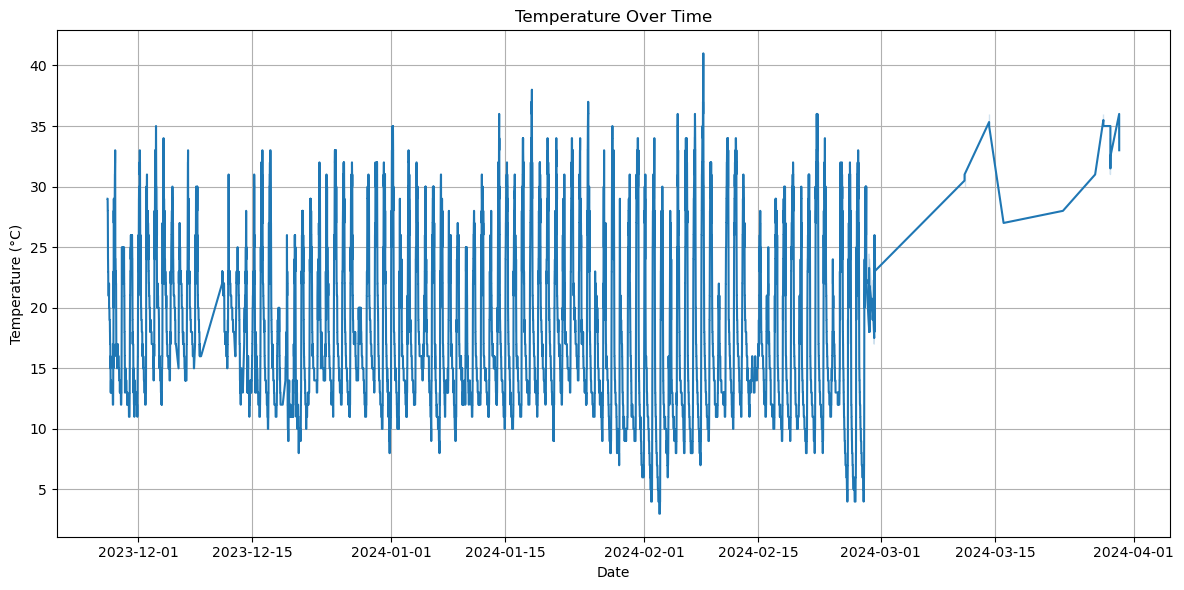

In [11]:
# Temperature over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_set, x='date', y='temperature')

plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

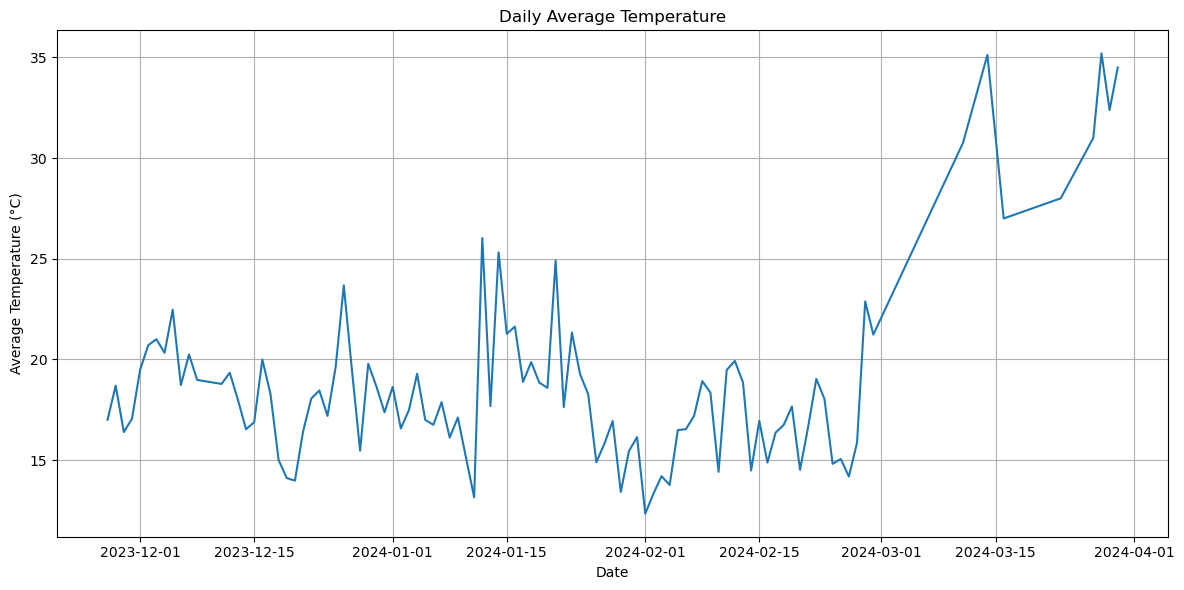

In [13]:
# Average temperature over time

# Create a new column for just the date (no time)
data_set['day'] = data_set['date'].dt.date

# Group by day and calculate mean temperature
daily_avg = data_set.groupby('day')['temperature'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_avg, x='day', y='temperature')

plt.title('Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

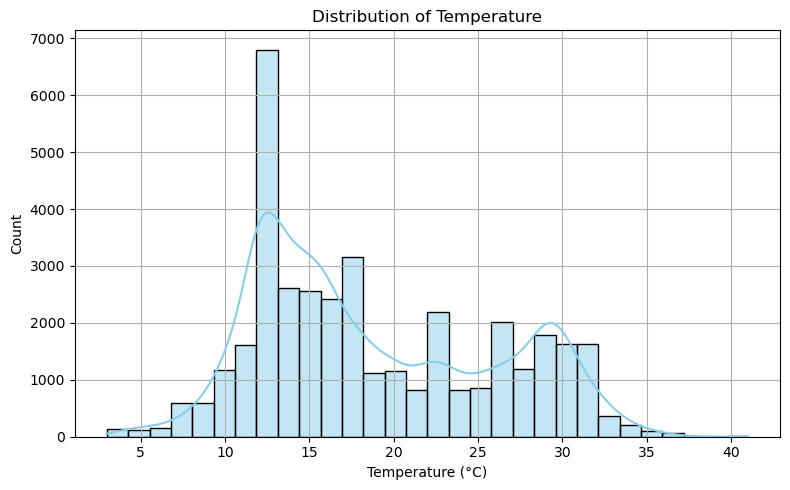

In [14]:
# Temperature Distribution

plt.figure(figsize=(8, 5))
sns.histplot(data=data_set, x='temperature', bins=30, kde=True, color='skyblue')

plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

---
### &nbsp;&nbsp;&nbsp;&nbsp; Step 3b: Humidity analysis

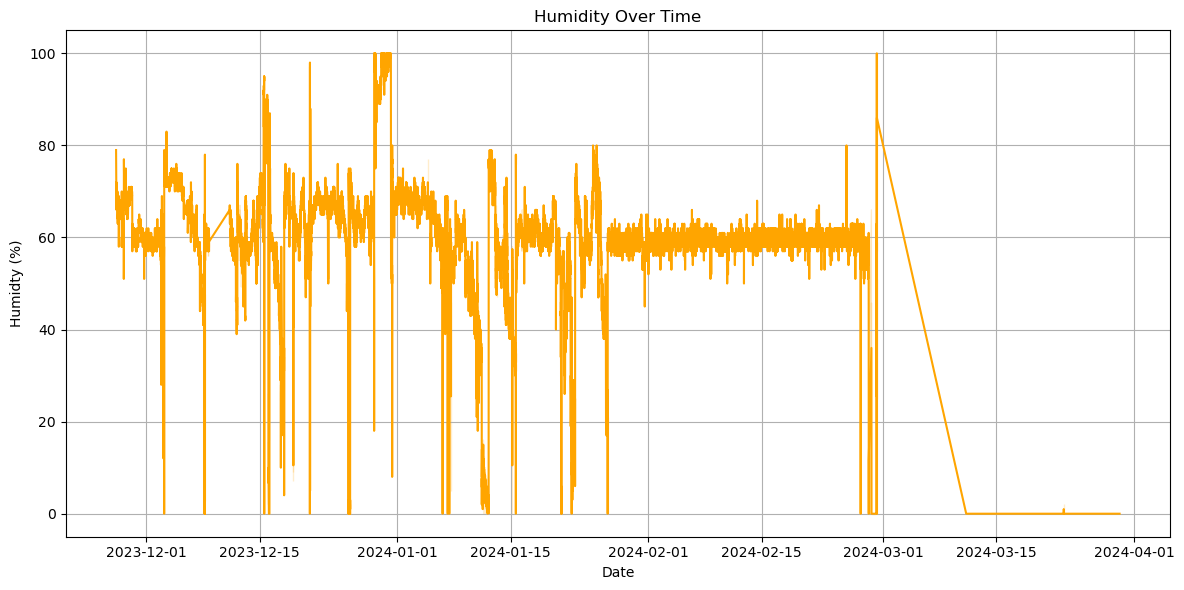

In [15]:
# Humidity over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_set, x='date', y='humidity', color='orange')

plt.title('Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidty (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

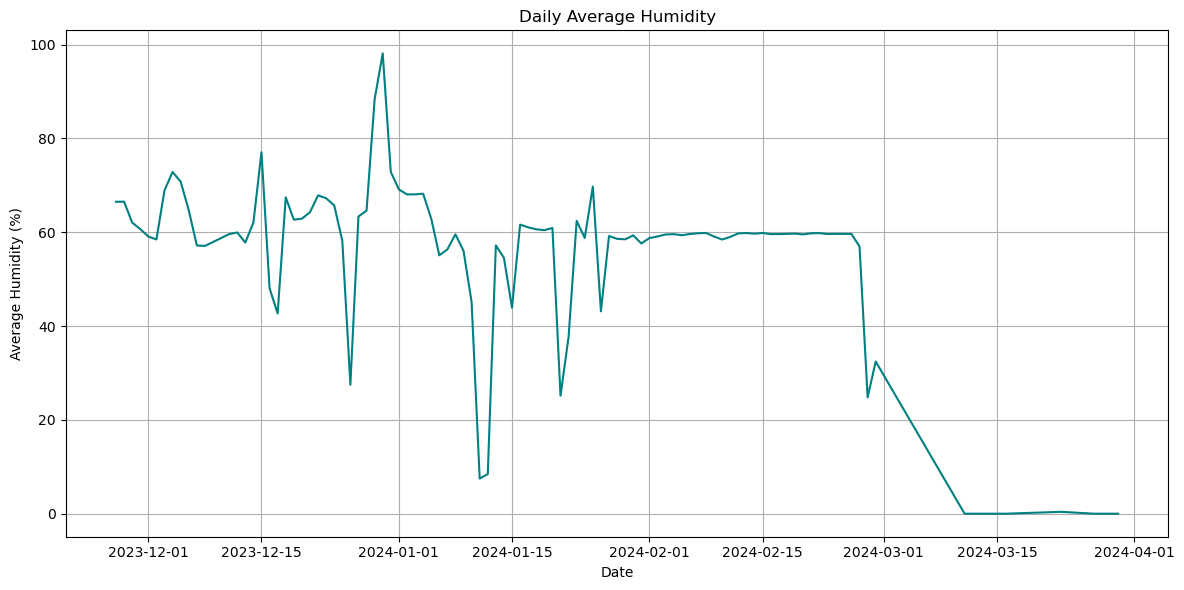

In [16]:
# Average Humidity over time

daily_avg_humidity = data_set.groupby('day')['humidity'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_avg_humidity, x='day', y='humidity', color='teal')

plt.title('Daily Average Humidity')
plt.xlabel('Date')
plt.ylabel('Average Humidity (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

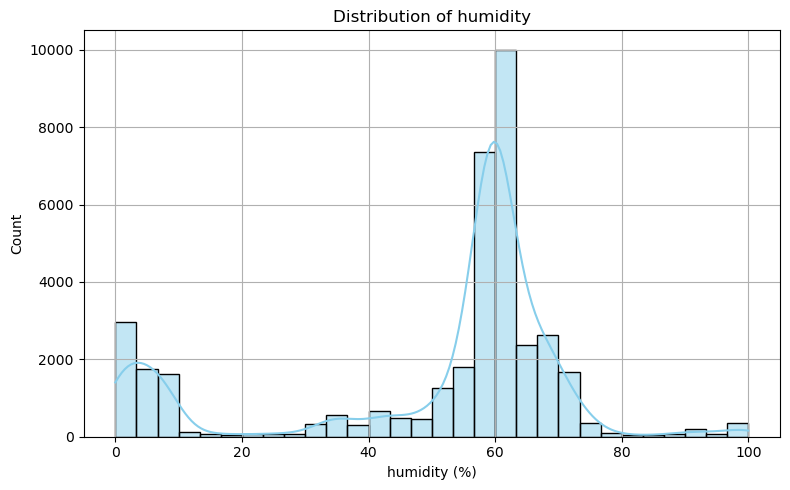

In [23]:
# Humidity Distribution

plt.figure(figsize=(8, 5))
sns.histplot(data=data_set, x='humidity', bins=30, kde=True, color='skyblue')

plt.title('Distribution of humidity')
plt.xlabel('humidity (%)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

---
### &nbsp;&nbsp;&nbsp;&nbsp; Step 3c: Water Level analysis

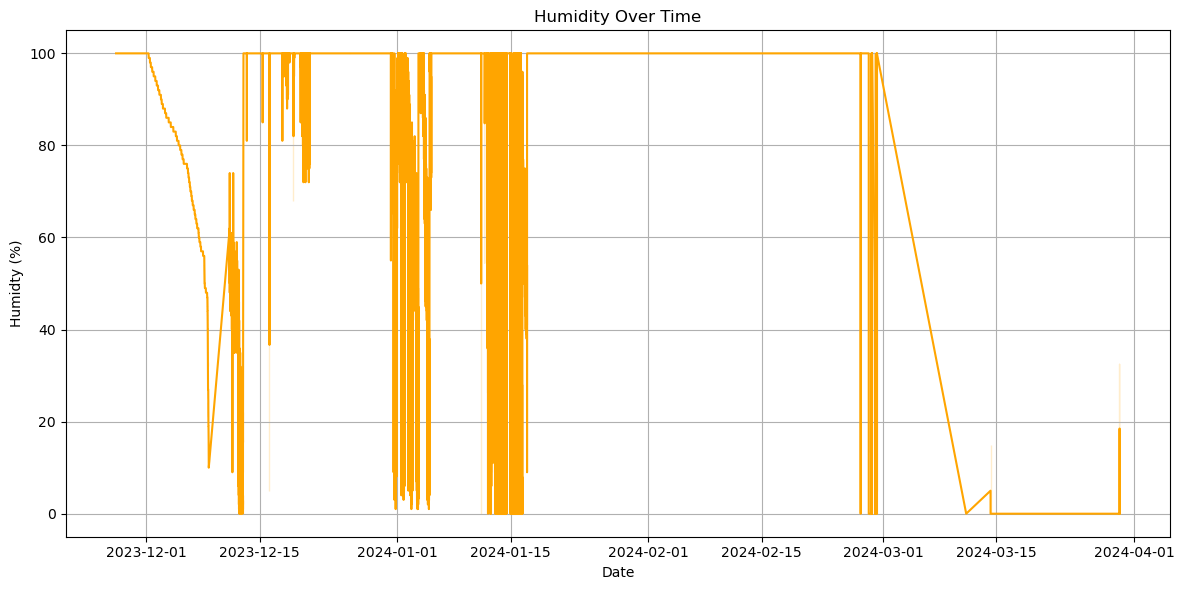

In [18]:
# Water Level over time

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_set, x='date', y='water_level', color='orange')

plt.title('Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidty (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

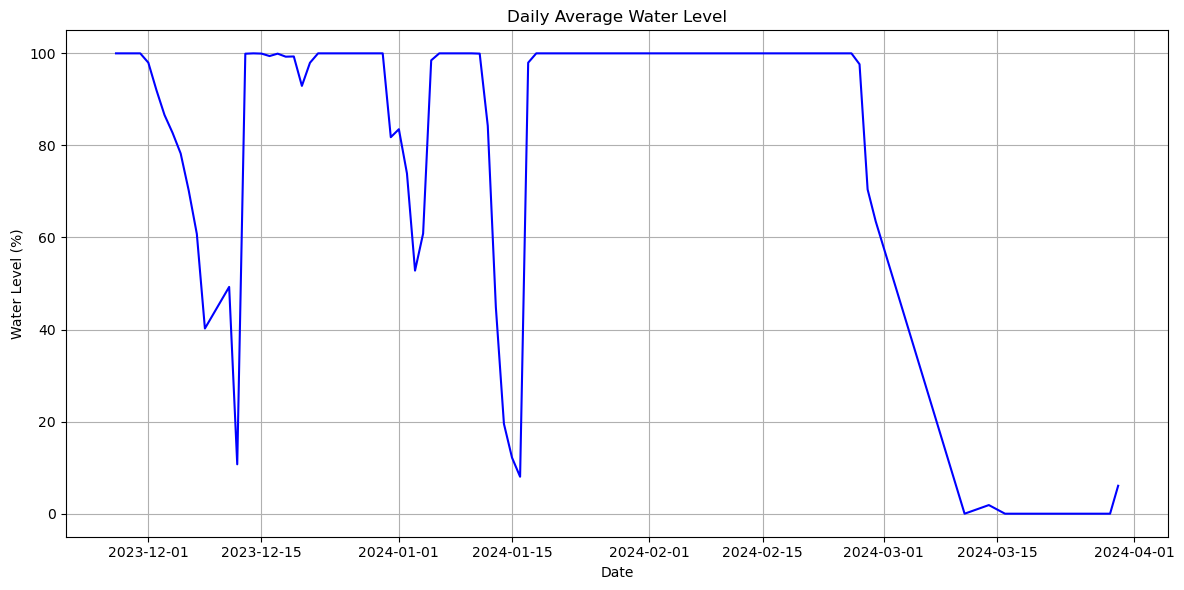

In [19]:
# Average Water Level over time

# Make sure 'day' column exists
data_set['day'] = data_set['date'].dt.date

# Group and compute daily average water level
daily_avg_water = data_set.groupby('day')['water_level'].mean().reset_index()

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_avg_water, x='day', y='water_level', color='blue')

plt.title('Daily Average Water Level')
plt.xlabel('Date')
plt.ylabel('Water Level (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

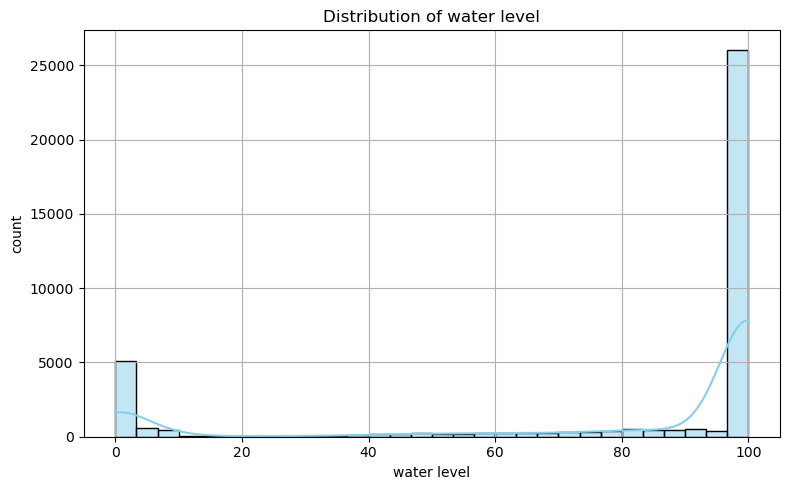

In [24]:
# Water Level Distribution


plt.figure(figsize=(8, 5))
sns.histplot(data=data_set, x='water_level', bins=30, kde=True, color='skyblue')

plt.title('Distribution of water level')
plt.xlabel('water level')
plt.ylabel('count')
plt.grid(True)
plt.tight_layout()
plt.show()

---
### &nbsp;&nbsp;&nbsp;&nbsp; All together now! Average Temp, humidity, and water level over time

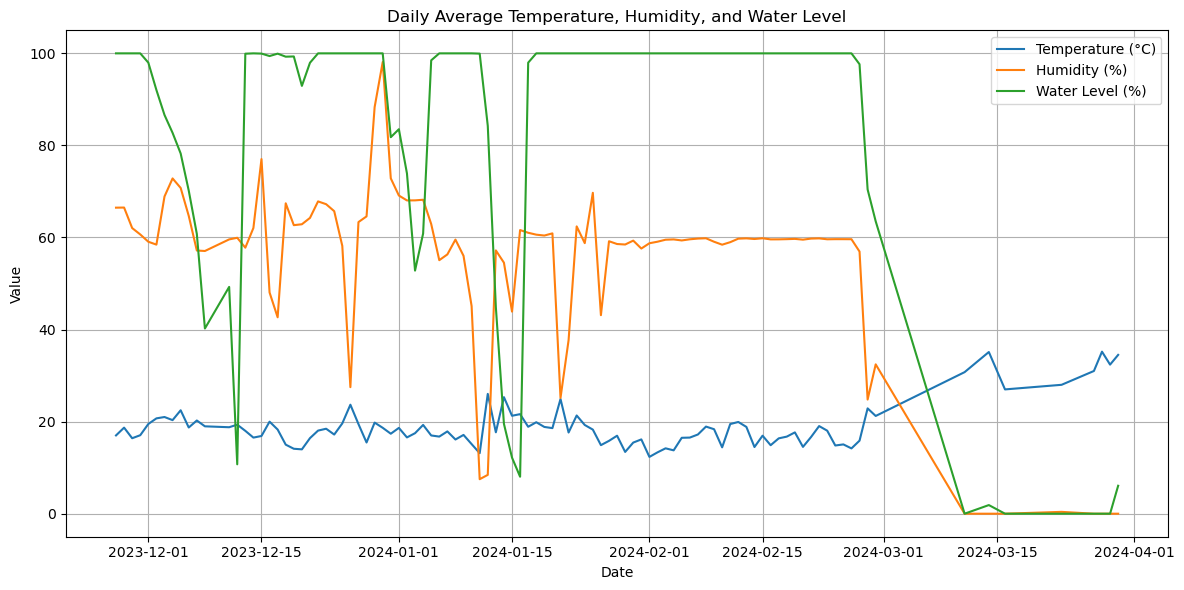

In [25]:
# Group by day for all three
daily_avg = data_set.groupby('day')[['temperature', 'humidity', 'water_level']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_avg, x='day', y='temperature', label='Temperature (°C)')
sns.lineplot(data=daily_avg, x='day', y='humidity', label='Humidity (%)')
sns.lineplot(data=daily_avg, x='day', y='water_level', label='Water Level (%)')

plt.title('Daily Average Temperature, Humidity, and Water Level')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---
### &nbsp;&nbsp;&nbsp;&nbsp; Relationship between Temp & Humidity

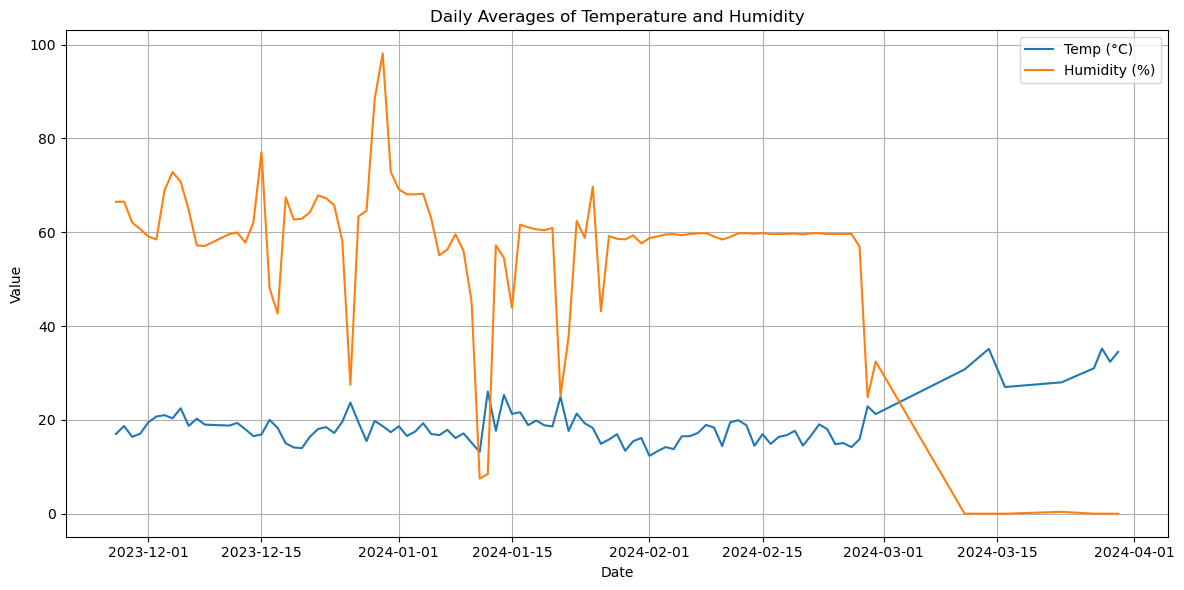

In [ ]:
# average temperature and humidity


daily_avg_both = data_set.groupby('day')[['temperature', 'humidity']].mean().reset_index()

# Plot both
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_avg_both, x='day', y='temperature', label='Temp (°C)')
sns.lineplot(data=daily_avg_both, x='day', y='humidity', label='Humidity (%)')

plt.title('Daily Averages of Temperature and Humidity')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

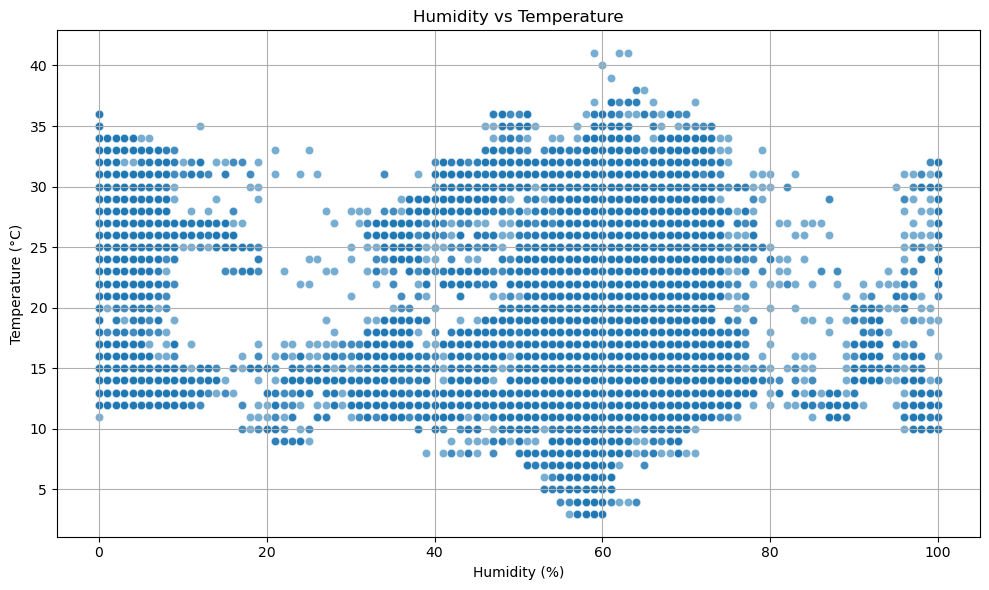

In [32]:
# Humidity vs Temperature scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_set,
    x='humidity',
    y='temperature',

    alpha=0.6,
    edgecolor='w'
)

plt.title('Humidity vs Temperature')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

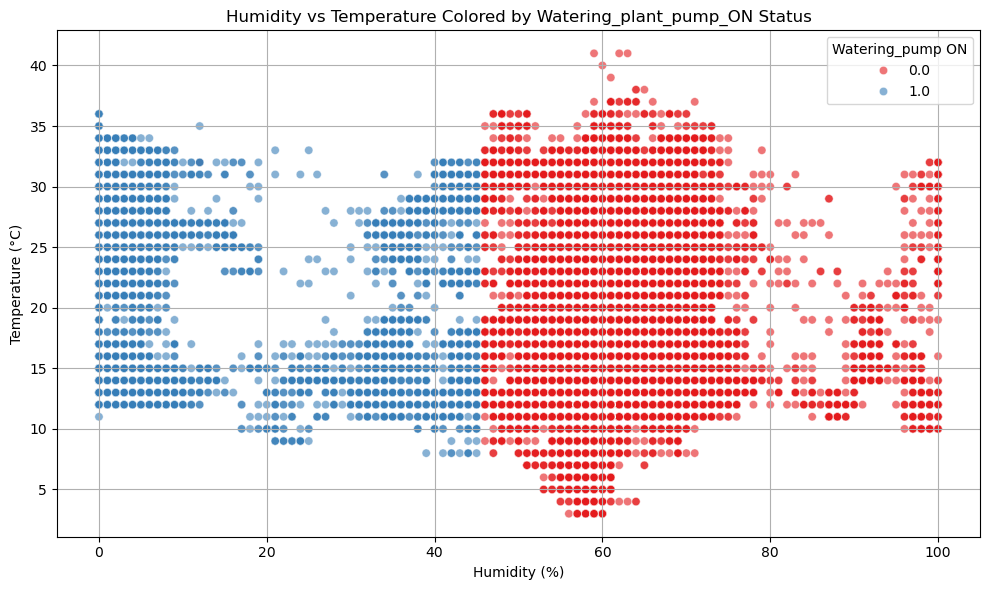

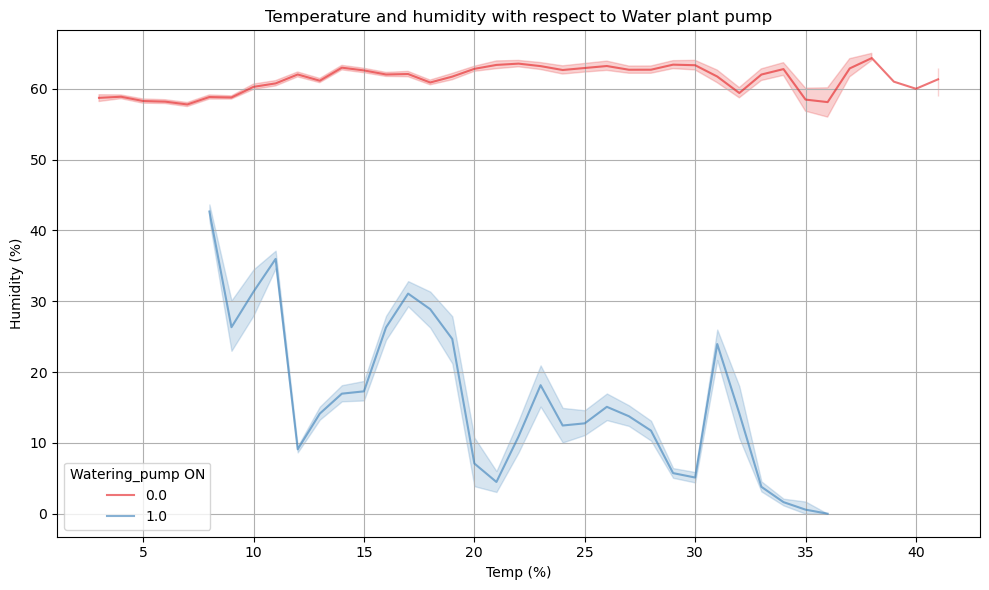

In [ ]:
# Humidity vs Temperature colored by additional variable 

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_set,
    x='humidity',
    y='temperature',
    hue='Watering_plant_pump_ON',  # Change this to any actuator column
    palette='Set1',         # Or try 'coolwarm', 'viridis', etc.
    alpha=0.6,
    edgecolor='w'
)

plt.title('Humidity vs Temperature Colored by Watering_plant_pump_ON Status')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend(title='Watering_pump ON')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=data_set,
    x='temperature',
    y='humidity',
    hue='Watering_plant_pump_ON',  # Change this to any actuator column
    palette='Set1',         # Or try 'coolwarm', 'viridis', etc.
    alpha=0.6,
)

plt.title("Temperature and humidity with respect to Water plant pump")
plt.xlabel('Temp (%)')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.legend(title='Watering_pump ON')
plt.tight_layout()
plt.show()

---
### &nbsp;&nbsp;&nbsp;&nbsp; Relationship between x and y. You choose!

---
### &nbsp;&nbsp;&nbsp;&nbsp; What about Nitrogen, Phosphorus, and Potassium?

---